In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white',color_codes=True)

In [9]:
s_bike=pd.read_csv('SeoulBikeData.csv')
s_bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
s_bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [11]:
col_name = s_bike.columns.values.tolist()
col_name

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [12]:
name_change ={
    'Date':'date',
    'Rented Bike Count': 'bike_count',
    'Hour': 'hour',
    'Temperature(°C)': 'temp',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature(°C)': 'dp_temp',
    'Solar Radiation (MJ/m2)': 'solar_rad',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Seasons': 'seasons',
    'Holiday': 'holiday',
    'Functioning Day': 'func_day'
}

In [14]:
s_bike.rename(columns=name_change,inplace=True)
s_bike.columns

Index(['date', 'bike_count', 'hour', 'Temperature(C)', 'humidity',
       'wind_speed', 'visibility', 'Dew point temperature(C)', 'solar_rad',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [15]:
season = s_bike['seasons'].unique()
season

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [16]:
ssn_cat={}
for i,j in enumerate(season): #To get the values printed along with their index we can use Python's 'enumerate' function
    ssn_cat[j]=i
    ssn_cat

In [17]:
s_bike['seasons']=s_bike['seasons'].map(ssn_cat) #map function executes specified for each item in an iterable

In [18]:
hol_cat={'No Holiday':0,
        'Holiday':1}
fd_cat ={'No':0,
        'yes':1}

In [19]:
s_bike['holiday'] = s_bike['holiday'].map(hol_cat)
s_bike['func_day'] = s_bike['func_day'].map(fd_cat)

In [20]:
s_bike.head(10)

,date,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,NaN
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,NaN
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,NaN
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,NaN
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,NaN
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,NaN
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,NaN
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,NaN
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,NaN
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,NaN


In [21]:
s_bike.describe()

,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,295.0
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.504110,0.049315,0.0
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.0
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2.000000,0.000000,0.0
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,0.000000,0.0
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,0.0


In [22]:
s_bike['date'] = pd.to_datetime(s_bike['date'])

In [23]:
#figure = plt.figure(dpi=150)
#sns.heatmap(s_bike.corr(),center=0,cmap='YlGnBu',annot=True) #A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors
#plt.show()
s_bike.corr()


,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day
bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,NaN
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-9.516382e-18,1.691160e-20,NaN
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,NaN
humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,NaN
wind_speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,NaN
visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,NaN
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,NaN
solar_rad,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,NaN
rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,NaN
snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,NaN


In [24]:
s_bike.groupby(['seasons','holiday'])['bike_count'].mean()
s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      8760 non-null   datetime64[ns]
 1   bike_count                8760 non-null   int64         
 2   hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   humidity                  8760 non-null   int64         
 5   wind_speed                8760 non-null   float64       
 6   visibility                8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   solar_rad                 8760 non-null   float64       
 9   rainfall                  8760 non-null   float64       
 10  snowfall                  8760 non-null   float64       
 11  seasons                   8760 non-null   int64         
 12  holiday             

In [25]:
import datetime
year=s_bike['date'].map(lambda d:'01-01-%d' % d.year).astype('datetime64')
year

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
8755   2018-01-01
8756   2018-01-01
8757   2018-01-01
8758   2018-01-01
8759   2018-01-01
Name: date, Length: 8760, dtype: datetime64[ns]

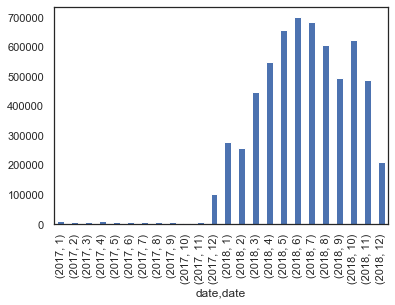

In [26]:
s_bike.groupby([pd.DatetimeIndex(s_bike['date']).year,
                pd.DatetimeIndex(s_bike['date']).month])['bike_count'].sum().plot(kind='bar')
               

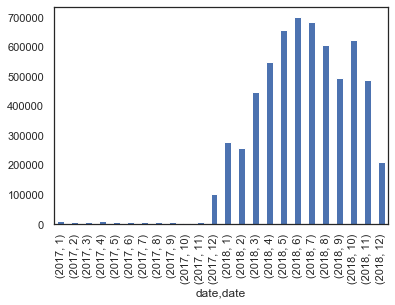

In [27]:
s_bike.groupby([pd.DatetimeIndex(s_bike['date']).year,
                pd.DatetimeIndex(s_bike['date']).month])['bike_count'].sum().plot(kind = 'bar')

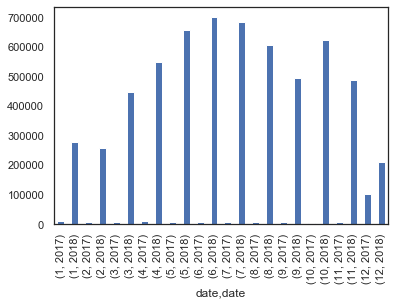

In [28]:
s_bike.groupby([pd.DatetimeIndex(s_bike['date']).month,
               pd.DatetimeIndex(s_bike['date']).year])['bike_count'].sum().plot(kind='bar')

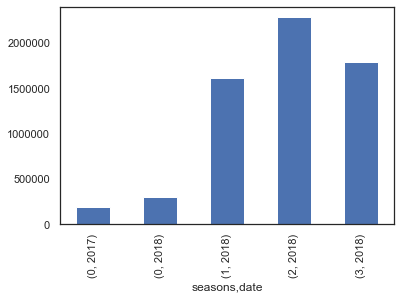

In [29]:
s_bike.groupby(['seasons',pd.DatetimeIndex(s_bike['date']).year])['bike_count'].sum().plot(kind='bar')

In [30]:
import datetime
day_name=[]
for i in s_bike['date']:
    day_name.append(i.strftime('%A'))
s_bike['day_name']=day_name

In [31]:
s_bike['weekdays']=np.where(s_bike['day_name'].values==['Friday','Saturday'],0,1)


In [32]:
s_bike['day_name']=='Sunday'


0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: day_name, Length: 8760, dtype: bool

In [33]:
week_num ={'Sunday':1,
          'Monday':2,
          'Tuesday':3,
          'Wednesday':4,
          'Thursday':5,
          'Friday':6,
          'Saturday':7}

In [34]:
s_bike['day_num']=s_bike['day_name'].map(week_num)
s_bike.drop('day_name',axis = 1, inplace=True)

In [35]:
s_bike['day']=pd.DatetimeIndex(s_bike['date']).day
s_bike['month']=pd.DatetimeIndex(s_bike['date']).month
s_bike['year']=pd.DatetimeIndex(s_bike['date']).year

In [36]:
s_bike.drop('date',axis=1,inplace=True)
s_bike.head(10)


,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day,weekdays,day_num,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,NaN,1,5,12,1,2017
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,NaN,1,5,12,1,2017
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,NaN,1,5,12,1,2017


In [37]:
s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bike_count                8760 non-null   int64  
 1   hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   humidity                  8760 non-null   int64  
 4   wind_speed                8760 non-null   float64
 5   visibility                8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   solar_rad                 8760 non-null   float64
 8   rainfall                  8760 non-null   float64
 9   snowfall                  8760 non-null   float64
 10  seasons                   8760 non-null   int64  
 11  holiday                   8760 non-null   int64  
 12  func_day                  295 non-null    float64
 13  weekdays                  8760 non-null   int32  
 14  day_num 

In [38]:
s_bike.corr()

,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day,weekdays,day_num,day,month,year
bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,NaN,NaN,4.953460e-02,4.684885e-02,7.086107e-02,0.215162
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-9.516382e-18,1.691160e-20,NaN,NaN,-1.094508e-17,1.598551e-19,2.684858e-18,0.000000
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,NaN,NaN,6.603053e-03,8.090791e-02,4.968327e-02,0.377796
humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,NaN,NaN,-4.653905e-03,7.047359e-03,4.779778e-02,0.035925
wind_speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,NaN,NaN,2.158618e-02,-6.123440e-02,-8.206909e-02,-0.003781
visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,NaN,NaN,3.876812e-02,-1.068595e-01,7.788783e-02,0.052381
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,NaN,NaN,8.023148e-04,6.970777e-02,6.510073e-02,0.336350
solar_rad,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,NaN,NaN,1.911955e-02,-3.445555e-03,-3.041240e-02,0.128086
rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,NaN,NaN,-1.230032e-02,1.199827e-02,-2.279368e-02,0.027522
snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,NaN,NaN,6.581537e-03,1.014355e-01,5.475846e-02,-0.206418


In [39]:
s_bike.cov()

,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day,weekdays,day_num,day,month,year
bike_count,416021.733390,1.831818e+03,4149.257754,-2623.853782,80.950203,78187.849382,3199.299111,146.717508,-89.558657,-39.946114,2.585394e+02,-1.010310e+01,0.0,0.0,6.396715e+01,2.658148e+02,1.575938e+02,38.690938
hour,1831.818358,4.792214e+01,10.262907,-34.062222,2.045964,415.850668,0.276150,0.872813,0.068061,-0.065053,-7.341491e-17,2.535045e-20,0.0,0.0,-1.516971e-16,9.734573e-18,6.408594e-17,0.000000
Temperature(C),4149.257754,1.026291e+01,142.678850,38.763038,-0.448739,252.817084,142.400017,3.668334,0.677602,-1.139387,7.874302e+00,-1.446652e-01,0.0,0.0,1.579119e-01,8.501449e+00,2.046272e+00,1.258122
humidity,-2623.853782,-3.406222e+01,38.763038,414.627875,-7.104540,-6726.950421,142.782065,-8.171237,5.430677,0.962098,4.294195e+00,-2.216854e-01,0.0,0.0,-1.897305e-01,1.262344e+00,3.355910e+00,0.203943
wind_speed,80.950203,2.045964e+00,-0.448739,-7.104540,1.073918,108.114660,-2.388639,0.299140,-0.023002,-0.001609,-1.926700e-01,5.164911e-03,0.0,0.0,4.478697e-02,-5.582171e-01,-2.932503e-01,-0.001092
visibility,78187.849382,4.158507e+02,252.817084,-6726.950421,108.114660,370027.323001,-1403.253586,79.130141,-115.040313,-32.330842,7.590653e+01,4.185096e+00,0.0,0.0,4.721522e+01,-5.718104e+02,1.633653e+02,8.883365
Dew point temperature(C),3199.299111,2.761502e-01,142.400017,142.782065,-2.388639,-1403.253586,170.573247,1.070865,1.850620,-0.860668,8.476852e+00,-1.887986e-01,0.0,0.0,2.097928e-02,8.008642e+00,2.931667e+00,1.224708
solar_rad,146.717508,8.728125e-01,3.668334,-8.171237,0.299140,79.130141,1.070865,0.754720,-0.072813,-0.027432,9.166423e-02,-9.551131e-04,0.0,0.0,3.325531e-02,-2.633142e-02,-9.109970e-02,0.031023
rainfall,-89.558657,6.806142e-02,0.677602,5.430677,-0.023002,-115.040313,1.850620,-0.072813,1.272819,0.004188,4.205928e-02,-3.485886e-03,0.0,0.0,-2.778371e-02,1.190760e-01,-8.866888e-02,0.008657
snowfall,-39.946114,-6.505309e-02,-1.139387,0.962098,-0.001609,-32.330842,-0.860668,-0.027432,0.004188,0.190747,-7.079603e-02,-1.190728e-03,0.0,0.0,5.755020e-03,3.897097e-01,8.246197e-02,-0.025134


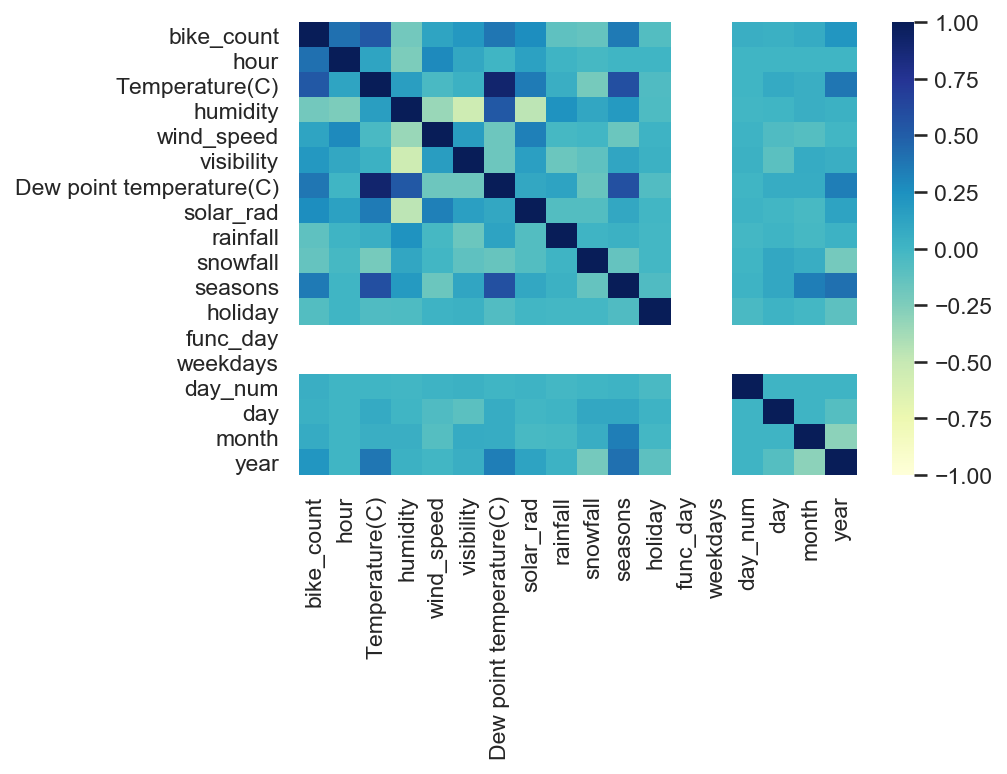

In [40]:
figure = plt.figure(dpi= 150)
sns.heatmap(s_bike.corr(),vmax = 1,vmin =-1,center= 0, cmap='YlGnBu')
plt.show()

In [63]:
Y= s_bike['bike_count']
X = s_bike.drop('bike_count',axis=1)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled = scaler.fit_transform(X)
Y.head(10)

0    254
1    204
2    173
3    107
4     78
5    100
6    181
7    460
8    930
9    490
Name: bike_count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=50)
Y= s_bike['bike_count']
X = s_bike.drop('bike_count',axis=1)


In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6132 entries, 2359 to 5600
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hour                      6132 non-null   int64  
 1   Temperature(C)            6132 non-null   float64
 2   humidity                  6132 non-null   int64  
 3   wind_speed                6132 non-null   float64
 4   visibility                6132 non-null   int64  
 5   Dew point temperature(C)  6132 non-null   float64
 6   solar_rad                 6132 non-null   float64
 7   rainfall                  6132 non-null   float64
 8   snowfall                  6132 non-null   float64
 9   seasons                   6132 non-null   int64  
 10  holiday                   6132 non-null   int64  
 11  func_day                  202 non-null    float64
 12  weekdays                  6132 non-null   int32  
 13  day_num                   6132 non-null   int64  
 14  day  

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [69]:
Y= s_bike['bike_count']
X=s_bike.drop('bike_count',axis=1)

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 897 to 2951
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hour                      6570 non-null   int64  
 1   Temperature(C)            6570 non-null   float64
 2   humidity                  6570 non-null   int64  
 3   wind_speed                6570 non-null   float64
 4   visibility                6570 non-null   int64  
 5   Dew point temperature(C)  6570 non-null   float64
 6   solar_rad                 6570 non-null   float64
 7   rainfall                  6570 non-null   float64
 8   snowfall                  6570 non-null   float64
 9   seasons                   6570 non-null   int64  
 10  holiday                   6570 non-null   int64  
 11  func_day                  216 non-null    float64
 12  weekdays                  6570 non-null   int32  
 13  day_num                   6570 non-null   int64  
 14  day   

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
Y = s_bike['bike_count']
X = s_bike.drop('bike_count', axis = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
Y.head(10)

0    254
1    204
2    173
3    107
4     78
5    100
6    181
7    460
8    930
9    490
Name: bike_count, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .30,
                                                    random_state = 50)

In [96]:
rc = RandomForestRegressor(n_estimators= 100, criterion= 'mse')

In [102]:
print(rc.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


In [99]:
cv = cross_validate(rc, x_train, y_train, cv = 10)

In [100]:
cv

{'fit_time': array([0.01440692, 0.0064404 , 0.00583982, 0.00490308, 0.00537968,
        0.01106286, 0.00862789, 0.00806546, 0.00800014, 0.0080173 ]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

In [106]:
pred = rc.predict(x_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [80]:
plt.scatter(Y_test, pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()


NameError: name 'y_test' is not defined

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, pred)

13015.249015981733

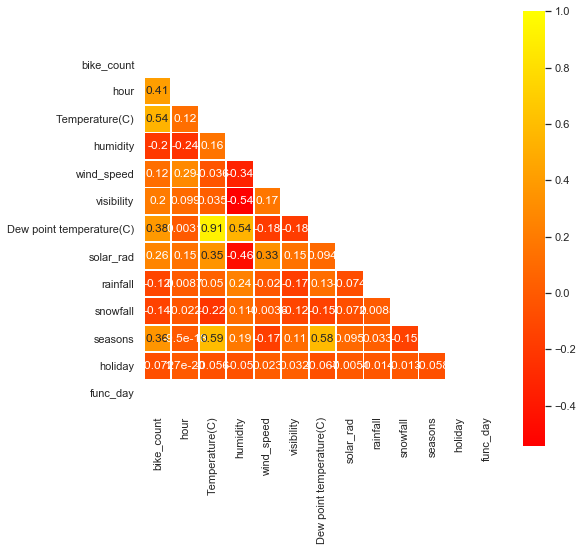

In [149]:
#correlation
corr = s_bike.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn",annot=True)

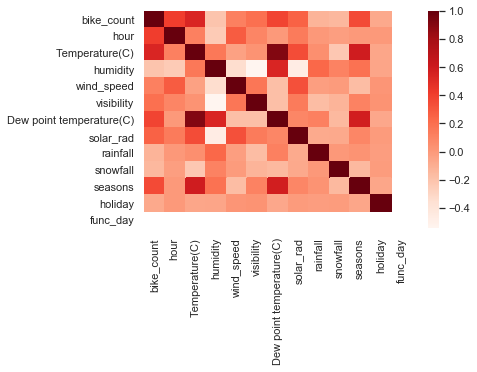

In [150]:
sns.heatmap(s_bike.corr(),cmap="Reds")

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr

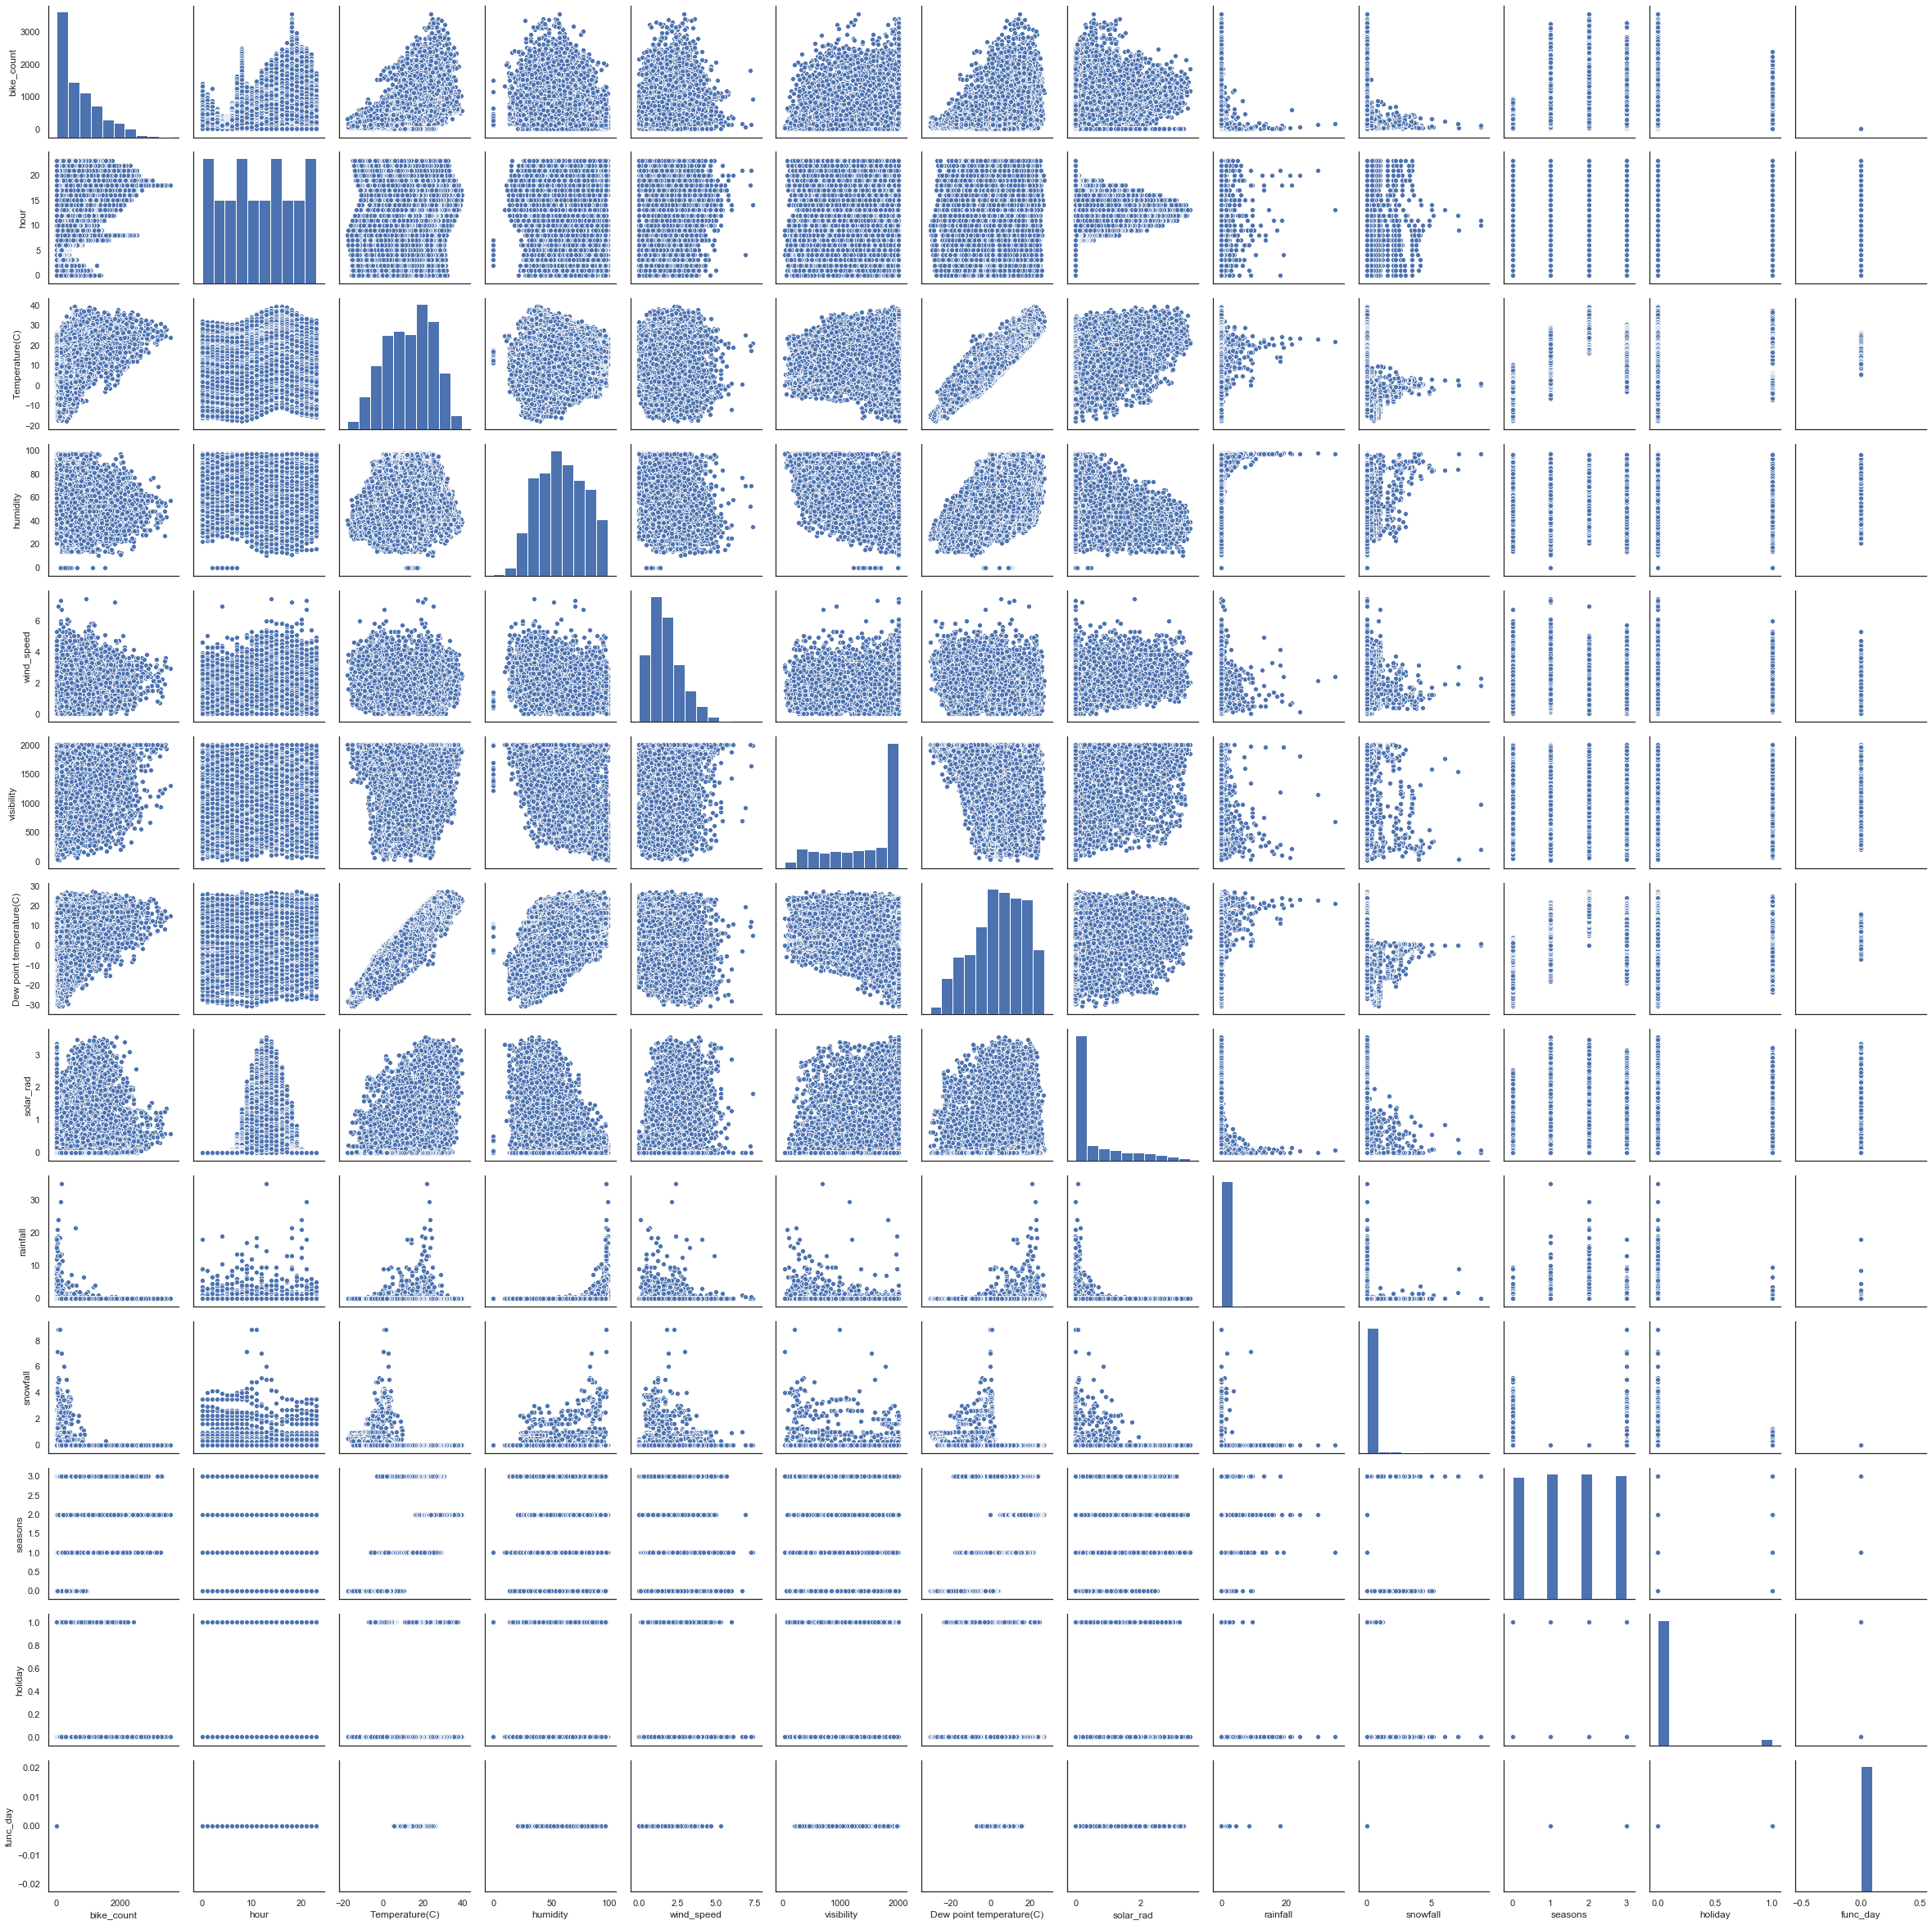

In [152]:
sns.pairplot(s_bike)

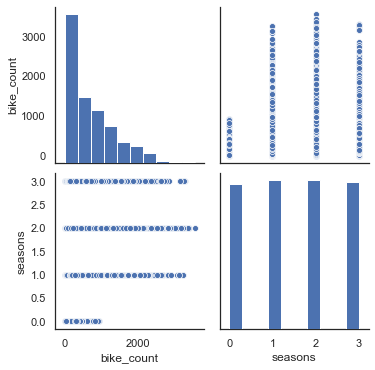

In [153]:
x= s_bike[['bike_count','seasons']]
sns.pairplot(x)

In [159]:
scipy.stats.pearsonr(s_bike['bike_count'],s_bike['seasons'])

(0.3596866862858997, 7.871689444120444e-266)

In [160]:
np.corrcoef(s_bike['bike_count'],s_bike['seasons'])

array([[1.        , 0.35968669],
       [0.35968669, 1.        ]])

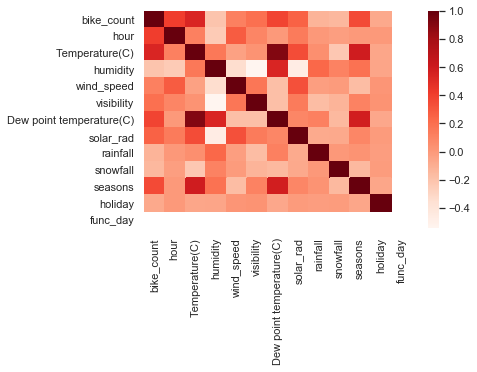

In [161]:
sns.heatmap(s_bike.corr(),cmap="Reds")

In [162]:
s_bike.corr()

,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day
bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,NaN
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-9.516382e-18,1.691160e-20,NaN
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,NaN
humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,NaN
wind_speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,NaN
visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,NaN
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,NaN
solar_rad,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,NaN
rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,NaN
snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,NaN


In [163]:
s_bike.corr().style.background_gradient(cmap='coolwarm')

,bike_count,hour,Temperature(C),humidity,wind_speed,visibility,Dew point temperature(C),solar_rad,rainfall,snowfall,seasons,holiday,func_day
bike_count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.359687,-0.072338,nan
hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-0.000000,0.000000,nan
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.591545,-0.055931,nan
humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.189238,-0.050278,nan
wind_speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.166834,0.023017,nan
visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.111974,0.031773,nan
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.582418,-0.066759,nan
solar_rad,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.094681,-0.005077,nan
rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.033453,-0.014269,nan
snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.145457,-0.012591,nan


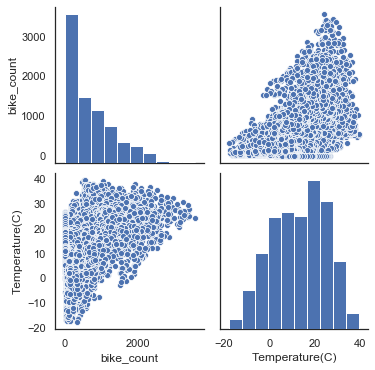

In [168]:
x= s_bike[['bike_count','Temperature(C)']]
sns.pairplot(x)

In [169]:
scipy.stats.pearsonr(s_bike['bike_count'],s_bike['Temperature(C)'])

(0.5385581530139791, 0.0)

In [170]:
np.corrcoef(s_bike['bike_count'],s_bike['Temperature(C)'])

array([[1.        , 0.53855815],
       [0.53855815, 1.        ]])

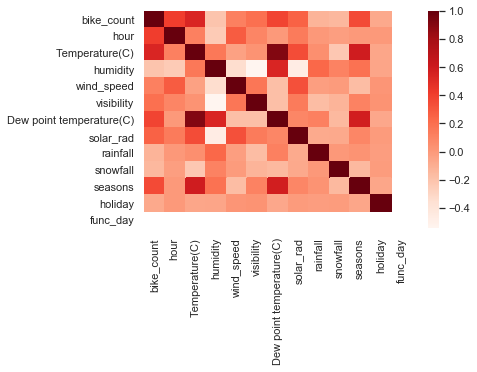

In [171]:
sns.heatmap(s_bike.corr(),cmap="Reds")

In [6]:
y= s_bike[['bike_count','humidity']]
sns.pairplot(x)

KeyError: "None of [Index(['bike_count', 'humidity'], dtype='object')] are in the [columns]"